In [7]:
# import pycarrot

# print(pycarrot.version)

In [1]:
import pandas as pd
import re
import numpy as np
import sqlite3
import os

In [2]:
pd.__version__

'2.1.4'

## 1. 렌딩클럽 데이터의 메타 데이터 확인하기

In [3]:
df_ldcb_schema = pd.read_excel("/Users/renee/my-workspace/pandas_automl_pycaret/lending_club_data/테이블정보_한글칼럼명추가.xlsx")

In [4]:
df_ldcb_schema

,no,LoanStatNew,Label,Description,Korean,lab_desc,korean_name
0,1,emp_title,borrower,The job title supplied by the Borrower when ap...,직업,고객 정보,직업명
1,2,emp_length,borrower,Employment length in years. Possible values ar...,연차,고객 정보,근무연차
2,3,home_ownership,borrower,The home ownership status provided by the borr...,주택_소유_상태,고객 정보,주택소유
3,4,zip_code,borrower,The first 3 numbers of the zip code provided b...,우편번호(앞 3자리),고객 정보,우편번호
4,5,addr_state,borrower,The state provided by the borrower in the loan...,거주중인 주,고객 정보,거주국가
...,...,...,...,...,...,...,...
145,146,settlement_term,settlement,The number of months that the borrower will be...,차용자가 정산 계획에 포함되는 개월 수,settlement(부채 정산)\n정보,대출정산계획개월수
146,147,open_acc_6m,trade,Number of open trades in last 6 months,최근 6개월 동안 진행된 거래의 개수,trade(금융 거래) 정보,최근은행거래횟수
147,148,total_cu_tl,trade,Number of finance trades,금융 거래 횟수,trade(금융 거래) 정보,은행대출거래횟수
148,149,acc_open_past_24mths,trade,Number of trades opened in past 24 months.,최근 24개월간 시작된 거래의 개수,trade(금융 거래) 정보,최근거래횟수


## 2. 컬럼명 확인

### 2-1 영문 컬럼명 확인

In [5]:
for i in df_ldcb_schema['LoanStatNew']:
    print(i, end=", ")

emp_title, emp_length, home_ownership, zip_code, addr_state, member_id, delinq_amnt, mort_acc, num_accts_ever_120_pd, num_actv_bc_tl, num_bc_sats, num_bc_tl, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, percent_bc_gt_75, delinq_2yrs, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, last_credit_pull_d, all_util, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies, tax_liens, mths_since_last_delinq, mths_since_last_major_derog, mths_since_recent_bc_dlq, mths_since_last_record, fico_range_low, fico_range_high, last_fico_range_high, last_fico_range_low, grade, sub_grade, hardship_flag, hardship_type, hardship_reason, hardship_status, deferral_term, hardship_amount, hardship_start_date, hardship_end_date, payment_plan_start_date, hardship_length, hardship_dpd, hardship_loan_status, orig_projected_additional_accrued_interest, hardship_payoff_balance_amount, ha

### 2-2 한글 컬럼명

In [6]:
for i in df_ldcb_schema['korean_name'] :
    print(i, end=", ")

직업명, 근무연차 , 주택소유, 우편번호, 거주국가, 회원번호, 세금체납금액, 주택담도대출계좌수, 연체계좌수, 은행카드활동계좌개수, 은행카드정상계좌개수, 은행카드개수, 은행카드정상개수, 중기연체계좌개수, 단기연체계좌개수, 장기연체계좌개수, 최근개설계좌개수, 특정한도이상소진계좌비율, 연체발생회수 , 신용한도시작일자, 신용한도개설기록횟수, 신용이상기록횟수, 리볼링잔액, 리볼링사용비율, 신용한도, 신용한도총기록회수, 신용한도잔액, 총신용한도금액, 신용한도금액, 은행카드신요한도, 추심횟수, 연체횟수, 파산기록횟수, 세금유치권횟수, 최종연체개월수, 신용평가불랭이후개월수, 최근연체발생후개월수, 마지막거래이후개월수, FICO상한범위, FICO하한범위, 이전FICO상한범위, 이전FICO하한범위, 신용평가등급, 신용평가보조등급, 상환계획실행여부, 상환계획유형, 상환계획사유, 상환계획진행상태, 상환예정개월수, 매월이자납부금액, 상환시작일자, 상환마감일자, 상환계획시작일자, 기준이하납부개월수, 상환미지계좌, 상환이후대출상태, 상환이후추가대출금액, 상환시작일이후상환금액, 상환시작일이후마지막상환금액, 대출금지급유형, 연소득금액, 소득인증상태, 부채대비소득비율, 공동총소득금액, 공동부채대비소득비율, 공동소득인증상태, 6개월간상담횟수, 상담횟수, 12개월간상담횟수, 최근상담이후개월수, 할부거래횟수, 일년간할부계좌개수, 이년간할부계좌개수, 할부계좌잔액, 신용한도대비할부비율, 할부총계좌수, 할부신용한도, 최근할부발생개월수, 가장오리댄할부발생개월수, 연체계조개수, 연체추심금액, 총계좌잔액, 청구최대금액, 계좌평금금액, 신용한도대금비율, 대출금액, 대출약정금액, 투자자대출약정금액, 대출상환기간, 대출이자율, 매월상환금액, 대출조달월, 대출현재상태, 대출지불계획상태, url주소, 대출설명, 대출용도, 대출제목, 대출가능상태, 공동대출여부, 최근계죄개설개월수, 최근은행카드개월수, 대출초기상태, 잔존원금, 투자자잔존원금, 납부된총원금, 투자자납부된총원금, 납부누적원금, 납부누적이자, 납부누적연체료,

### 2-3 칼럼에 대한 설명

In [7]:
for i in df_ldcb_schema['Korean'] :
    print(i, end=", ")

직업, 연차, 주택_소유_상태, 우편번호(앞 3자리), 거주중인 주, 고객 ID, 체납 금액, 주택담보대출 계좌 수, 120일 이상 연체 계좌 수, 활성 카드 계좌 수, 정상 카드 계좌 수, 카드 계좌 수, 정상 계좌 수, 120일 연체 계좌 수, 30일 연체 계좌 수, 24개월 간 90일 이상 연체된 계좌 수, 최근  12개월 간 개설 계좌, 한도 75% 이상 사용한 카드 계좌 비율, 30일 이상 연체 발생한 횟수, 최초 신용한도 시작 월, 오픈 크레딧 기록 수, 신용에 불리한 기록 수, 총 대금 잔고, 대금 사용 비율, 신용 정보 기록 수, 최근 대출금 지급 월, 신용 한도 잔액, 총 신용 한도, 신용 한도 잔액(주택담보대출 제외), 총 카드 한도 금액, 12개월 내 추심 수, 12개월 내 연체 횟수, 공식적인 파산 기록 수, 세금 유치권 수, 차용인의 마지막 연체 이후의 개월 수 , 최근 90 일 또는 더 나쁜 평가 이후의 개월 수, 가장 최근의 카드 연체 이후의 개월 수 , 가장 최근의 기록으로부터의 개월 수 , FICO 상한범위(대출 시), FICO 하한범위(대출 시), FICO 상한범위(이전), FICO 하한범위(이전), 대출 등급, 대출 보조 등급, 상환 계획 착수 여부, 상환 계획 유형, 대출 사유, 상환 진행 상태, 상환 예정 개월수, 매달 이자 납부액, 상환 시작일, 상환 마감일, 상환 계획 착수 일자, 기준 미만 납부 개월 수, 상환 시작일보다 늦어진 계좌, 상환 시작일 이후 대출 상태, 상환 시작일 이후 추가된 금액, 시작일 이후 상환한 금액, 상환 시작일 이후 최종 지급액, 대출금 지급 유형, 연소득, 소득 인증 여부, 부채 대비 소득 비율, 공동 대출고객 포함 총 소득, 공동 대출고객 부채 대비 소득 비율, 공동 대출고객 소득 인증 여부, 지난 6개월 간 상담 수, 상담 수, 지난 12개월 간 상담 수, 가장 최근 상담 이후의 개월 수 , 할부 거래 수, 지난 12개월 간 개설한 할부 계좌 수, 지난 24개월 간 개설한 할부 계좌 수,

In [8]:
### 2-4 테이블 확인

In [9]:
df_ldcb_schema['Label']

0        borrower
1        borrower
2        borrower
3        borrower
4        borrower
          ...    
145    settlement
146         trade
147         trade
148         trade
149         trade
Name: Label, Length: 150, dtype: object

In [10]:
df_ldcb_schema['Label'].value_counts()

Label
credit                 32
loan_account           23
hardship               16
payment                13
secondary_applicant    13
revolving              11
installment             9
settlement              7
borrower                6
credit_rating           6
income                  6
inquiry                 4
trade                   4
Name: count, dtype: int64

## 3. 클래스를 정의해서 메타 데이터 확인하기

In [11]:
class SearchMeta :
    def __init__(self,schema) :
        self.schema = schema
        self._createEnSchema()
        self._createKrSchema()
     
    def _createEnSchema(self) :
        self.edd = {k:v for k,v in zip(self.schema['LoanStatNew'].values,self.schema['korean_name'].values)} 

    def _createKrSchema(self) :
        self.kdd = {k:v for k,v in zip(self.schema['korean_name'].values,self.schema['LoanStatNew'].values)} 

    def searchEnMeta(self,key) :
        return self.edd.get(key) 

    def searchEnMetaAll(self,keys) :
        return [ self.edd.get(key) for key in keys] 

    def searchKrMeta(self,key) :
        return self.kdd.get(key) 

    def searchKrMetaAll(self,keys) :
        return [ self.kdd.get(key) for key in keys] 

    def searchLable(self,lable) :
        return self.schema[self.schema['Label'] == lable]

In [12]:
## 모듈로 처리하기

In [13]:
%%writefile meta.py

class SearchMeta :
    def __init__(self,schema) :
        self.schema = schema
        self._createEnSchema()
        self._createKrSchema()
     
    def _createEnSchema(self) :
        self.edd = {k:v for k,v in zip(self.schema['LoanStatNew'].values,self.schema['korean_name'].values)} 

    def _createKrSchema(self) :
        self.kdd = {k:v for k,v in zip(self.schema['korean_name'].values,self.schema['LoanStatNew'].values)} 

    def searchEnMeta(self,key) :
        return self.edd.get(key) 

    def searchEnMetaAll(self,keys) :
        return [ self.edd.get(key) for key in keys] 

    def searchKrMeta(self,key) :
        return self.kdd.get(key) 

    def searchKrMetaAll(self,keys) :
        return [ self.kdd.get(key) for key in keys] 

    def searchLable(self,lable) :
        return self.schema[self.schema['Label'] == lable]

Overwriting meta.py


In [14]:
## 객체 생성하기

In [15]:
meta = SearchMeta(df_ldcb_schema)

In [16]:
## 테이블 이름으로 메타정보 확인하기

In [17]:
meta.searchLable("borrower")

,no,LoanStatNew,Label,Description,Korean,lab_desc,korean_name
0,1,emp_title,borrower,The job title supplied by the Borrower when ap...,직업,고객 정보,직업명
1,2,emp_length,borrower,Employment length in years. Possible values ar...,연차,고객 정보,근무연차
2,3,home_ownership,borrower,The home ownership status provided by the borr...,주택_소유_상태,고객 정보,주택소유
3,4,zip_code,borrower,The first 3 numbers of the zip code provided b...,우편번호(앞 3자리),고객 정보,우편번호
4,5,addr_state,borrower,The state provided by the borrower in the loan...,거주중인 주,고객 정보,거주국가
5,6,member_id,borrower,A unique LC assigned Id for the borrower member.,고객 ID,고객 정보,회원번호


In [18]:
## 4. 렌딩클럽 파케이 데이터 읽기

In [19]:
### 4-1 파케이 파일 읽기

In [20]:
### 위치 지정하기

In [21]:
%pwd

'/Users/renee/my-workspace/pandas_automl_pycaret'

In [22]:
path = '/Users/renee/my-workspace/pandas_automl_pycaret/data/lending_club_parquet/'

In [23]:
## 파일을 읽고 상태 확인하기

In [24]:
df = pd.read_parquet(path)

In [25]:
df.shape

(2260701, 151)

In [26]:
## 4-2 스키마 확인

In [27]:
### 헤더 스키마 확인하기

In [28]:
df.select_dtypes(include="object").head().columns

Index(['id', 'member_id', 'term', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_st

In [29]:
### 한글 정보 읽기

In [30]:
df_schema = pd.read_excel("./lending_club_data/테이블정보_한글칼럼명추가.xlsx")

In [31]:
import meta

In [32]:
df_cols = meta.SearchMeta(df_schema)

In [33]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [34]:
cols = df_cols.searchEnMetaAll(df.columns[1:])

In [35]:

for i in cols :
    print(i, end=", ")


회원번호, 대출금액, 대출약정금액, 투자자대출약정금액, 대출상환기간, 대출이자율, 매월상환금액, 신용평가등급, 신용평가보조등급, 직업명, 근무연차 , 주택소유, 연소득금액, 소득인증상태, 대출조달월, 대출현재상태, 대출지불계획상태, url주소, 대출설명, 대출용도, 대출제목, 우편번호, 거주국가, 부채대비소득비율, 연체발생회수 , 신용한도시작일자, FICO상한범위, FICO하한범위, 6개월간상담횟수, 최종연체개월수, 마지막거래이후개월수, 신용한도개설기록횟수, 신용이상기록횟수, 리볼링잔액, 리볼링사용비율, 신용한도, 대출초기상태, 잔존원금, 투자자잔존원금, 납부된총원금, 투자자납부된총원금, 납부누적원금, 납부누적이자, 납부누적연체료, 채무불이행회수율, 채무불이행회수범위, 최근지급월, 최근지급금액, 다음지급금액, 신용한도총기록회수, 이전FICO상한범위, 이전FICO하한범위, 추심횟수, 신용평가불랭이후개월수, 대출가능상태, 공동대출여부, 공동총소득금액, 공동부채대비소득비율, 공동소득인증상태, 연체계조개수, 연체추심금액, 총계좌잔액, 최근은행거래횟수, 할부거래횟수, 일년간할부계좌개수, 이년간할부계좌개수, 최근할부발생개월수, 할부계좌잔액, 신용한도대비할부비율, 일년간리볼링거래횟수, 이년간리볼빙거래횟수, 청구최대금액, 신용한도잔액, 리볼빙신용최대한도, 상담횟수, 은행대출거래횟수, 12개월간상담횟수, 최근거래횟수, 계좌평금금액, 리볼빙구매총금액, 신용한도대금비율, 연체횟수, 세금체납금액, 가장오리댄할부발생개월수, 과거리볼빙발생개월수, 최근리볼빙발생개월수, 최근계죄개설개월수, 주택담도대출계좌수, 최근은행카드개월수, 최근연체발생후개월수, 최근상담이후개월수, 최근리볼빙연체개월수, 연체계좌수, 은행카드활동계좌개수, 현재리볼빙진행개수, 은행카드정상계좌개수, 은행카드개수, 할부총계좌수, 현재개설된리볼빙계좌개수, 리볼빙총계좌수, 잔고0이상리볼빙거래개수, 은행카드정상개수, 중기연체계좌개수, 단기연체계좌개수, 장기연체계좌개수, 최근개설계좌개수, 미연체거래비율, 특정한도이상소진계좌비율, 파

In [36]:
## id 추가

In [37]:
cols.insert(0, df.columns[0])

In [38]:
for i in cols :
    print(i, end=", ")

id, 회원번호, 대출금액, 대출약정금액, 투자자대출약정금액, 대출상환기간, 대출이자율, 매월상환금액, 신용평가등급, 신용평가보조등급, 직업명, 근무연차 , 주택소유, 연소득금액, 소득인증상태, 대출조달월, 대출현재상태, 대출지불계획상태, url주소, 대출설명, 대출용도, 대출제목, 우편번호, 거주국가, 부채대비소득비율, 연체발생회수 , 신용한도시작일자, FICO상한범위, FICO하한범위, 6개월간상담횟수, 최종연체개월수, 마지막거래이후개월수, 신용한도개설기록횟수, 신용이상기록횟수, 리볼링잔액, 리볼링사용비율, 신용한도, 대출초기상태, 잔존원금, 투자자잔존원금, 납부된총원금, 투자자납부된총원금, 납부누적원금, 납부누적이자, 납부누적연체료, 채무불이행회수율, 채무불이행회수범위, 최근지급월, 최근지급금액, 다음지급금액, 신용한도총기록회수, 이전FICO상한범위, 이전FICO하한범위, 추심횟수, 신용평가불랭이후개월수, 대출가능상태, 공동대출여부, 공동총소득금액, 공동부채대비소득비율, 공동소득인증상태, 연체계조개수, 연체추심금액, 총계좌잔액, 최근은행거래횟수, 할부거래횟수, 일년간할부계좌개수, 이년간할부계좌개수, 최근할부발생개월수, 할부계좌잔액, 신용한도대비할부비율, 일년간리볼링거래횟수, 이년간리볼빙거래횟수, 청구최대금액, 신용한도잔액, 리볼빙신용최대한도, 상담횟수, 은행대출거래횟수, 12개월간상담횟수, 최근거래횟수, 계좌평금금액, 리볼빙구매총금액, 신용한도대금비율, 연체횟수, 세금체납금액, 가장오리댄할부발생개월수, 과거리볼빙발생개월수, 최근리볼빙발생개월수, 최근계죄개설개월수, 주택담도대출계좌수, 최근은행카드개월수, 최근연체발생후개월수, 최근상담이후개월수, 최근리볼빙연체개월수, 연체계좌수, 은행카드활동계좌개수, 현재리볼빙진행개수, 은행카드정상계좌개수, 은행카드개수, 할부총계좌수, 현재개설된리볼빙계좌개수, 리볼빙총계좌수, 잔고0이상리볼빙거래개수, 은행카드정상개수, 중기연체계좌개수, 단기연체계좌개수, 장기연체계좌개수, 최근개설계좌개수, 미연체거래비율, 특정한도이상소진계좌비

In [39]:
## 데이터프레임에 칼럼명을 한글로 변경하기

In [40]:
df.columns = cols

In [41]:
df.head()

,id,회원번호,대출금액,대출약정금액,투자자대출약정금액,대출상환기간,대출이자율,매월상환금액,신용평가등급,신용평가보조등급,...,상환시작일이후상환금액,상환시작일이후마지막상환금액,대출금지급유형,대출협력여부,가장최근상환일자,대출정산계획상태,대출정산계획일자,대출정산금액,대출정산비율금액,대출정산계획개월수
0,63918338,None,25000.0,25000.0,25000.0,60 months,9.17,521.03,B,B2,...,None,None,Cash,N,None,None,None,None,None,None
1,60635644,None,30000.0,30000.0,30000.0,36 months,12.29,1000.59,C,C1,...,None,None,Cash,N,None,None,None,None,None,None
2,57206438,None,6000.0,6000.0,6000.0,36 months,9.17,191.28,B,B2,...,None,None,Cash,Y,May-2018,COMPLETE,May-2018,1050.0,49.95,1.0
3,65826019,None,6400.0,6400.0,6400.0,36 months,9.99,206.48,B,B3,...,None,None,Cash,N,None,None,None,None,None,None
4,62854410,None,35000.0,35000.0,35000.0,60 months,17.57,880.61,D,D4,...,None,None,Cash,N,None,None,None,None,None,None


In [42]:
## 5. 데이터 변환

In [43]:
### 5-1날짜 변환

In [44]:
df_cols.searchEnMeta('issue_d')

'대출조달월'

In [45]:
df['대출조달월'].unique()

array(['Nov-2015', 'Sep-2015', 'Aug-2015', 'Dec-2015', 'Oct-2015',
       'Jul-2015', 'Feb-2015', 'May-2015', 'Mar-2015', 'Apr-2015',
       'Jun-2015', 'Jan-2015', 'Jan-2018', 'Sep-2017', 'Mar-2018',
       'Feb-2018', 'May-2016', 'Jul-2017', 'Apr-2016', 'Aug-2017',
       'Jun-2016', 'Sep-2018', 'Jul-2018', 'Jun-2017', 'Aug-2018',
       'May-2017', 'Mar-2016', 'Feb-2016', 'Apr-2017', 'Jan-2016',
       'Nov-2014', 'Dec-2014', 'May-2014', 'Oct-2014', 'Jul-2014',
       'Jun-2014', 'Sep-2014', 'Aug-2014', 'Apr-2014', 'Mar-2014',
       'Oct-2018', 'Nov-2018', 'Dec-2018', 'Jan-2014', 'Feb-2014',
       'May-2018', 'Apr-2018', 'Jun-2018', 'Jan-2011', 'Aug-2011',
       'Dec-2011', 'Feb-2011', 'Nov-2010', 'Jul-2011', 'Mar-2011',
       'May-2011', 'Jun-2011', 'Jun-2010', 'Oct-2011', 'Apr-2011',
       'Oct-2010', 'May-2010', 'Sep-2010', 'Nov-2011', 'Dec-2010',
       'Jul-2010', 'Sep-2011', 'Apr-2010', 'Aug-2010', 'Mar-2010',
       'Mar-2017', 'Dec-2013', 'Aug-2013', 'Jan-2017', 'Sep-20

In [46]:
df['대출조달월'].value_counts()

대출조달월
Mar-2016           61992
Oct-2015           48630
May-2018           46311
Oct-2018           46305
Aug-2018           46079
                   ...  
Jul-2007              63
Sep-2008              57
Sep-2007              53
Jun-2007              24
Source Verified        1
Name: count, Length: 140, dtype: int64

In [47]:
### 5-2 널값과 이상값 변환

In [48]:
df = df.drop(df[df['대출조달월'] == "Source Verified"].index)

In [49]:
df['대출조달월'].isnull().sum()

33

In [50]:
df['대출조달월'] = df['대출조달월'].fillna("")

In [51]:
## 날짜를 변환

In [52]:
df['대출조달월_날짜변환'] = pd.to_datetime(df['대출조달월'])

/var/folders/fx/9ww3rpmn0bv09r8_8v0l2wfm0000gn/T/ipykernel_85066/1439906403.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['대출조달월_날짜변환'] = pd.to_datetime(df['대출조달월'])


In [53]:
df['대출조달월_날짜변환'].dtype

dtype('<M8[ns]')

In [54]:
## 날짜를 처리하는 객체 알아보기

In [55]:
dir(df['대출조달월_날짜변환'].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'as_unit',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'mont

In [56]:
df['대출조달월_날짜변환'].dt.year

0          2015.0
1          2015.0
2          2015.0
3          2015.0
4          2015.0
            ...  
2260696    2016.0
2260697    2016.0
2260698    2016.0
2260699    2016.0
2260700    2016.0
Name: 대출조달월_날짜변환, Length: 2260700, dtype: float64

In [57]:
(df['대출조달월_날짜변환'].dt.year).value_counts()

대출조달월_날짜변환
2018.0    495242
2017.0    443579
2016.0    434407
2015.0    421094
2014.0    235629
2013.0    134814
2012.0     53367
2011.0     21721
2010.0     12537
2009.0      5281
2008.0      2393
2007.0       603
Name: count, dtype: int64

In [58]:
## 6. 특정 데이터 선택

In [59]:
### 6-1 특정 데이터만 선택

In [60]:
(df['대출조달월_날짜변환'].dt.year == 2012.0).sum()

53367

In [61]:
df_2012 = df[df['대출조달월_날짜변환'].dt.year == 2012.0]

In [62]:
df_2012.shape

(53367, 152)

In [63]:
### 6-2 데이터 변환 후 삭제

In [64]:
df_2012.loc[:, '대출조달월'] = df_2012['대출조달월_날짜변환']

In [65]:
df_2012 = df_2012.drop('대출조달월_날짜변환', axis=1)

In [66]:
df_2012.shape

(53367, 151)

In [67]:
### 데이터 저장하기

In [68]:
path_w = './lending_club_data/lending_club_2012_2.csv'

In [69]:
df_2012.to_csv(path_w,index=False)

In [70]:
### 6-4 데이터 읽어오기

In [71]:
accept = pd.read_csv(path_w,low_memory=False)

In [72]:
accept.head()

,id,회원번호,대출금액,대출약정금액,투자자대출약정금액,대출상환기간,대출이자율,매월상환금액,신용평가등급,신용평가보조등급,...,상환시작일이후상환금액,상환시작일이후마지막상환금액,대출금지급유형,대출협력여부,가장최근상환일자,대출정산계획상태,대출정산계획일자,대출정산금액,대출정산비율금액,대출정산계획개월수
0,2515062,NaN,8500.0,8500.0,8500.0,36 months,13.11,286.85,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1435195,NaN,15850.0,15850.0,15850.0,36 months,19.05,581.40,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1856218,NaN,23850.0,23850.0,23850.0,60 months,19.05,619.34,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,2216955,NaN,18000.0,18000.0,17950.0,60 months,19.05,467.43,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1506044,NaN,14000.0,14000.0,13750.0,36 months,12.12,465.81,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
### 6-5 테이블 생성하기

In [74]:
### 테이블 생성 함수

In [75]:
def put(df_csv, label_info, db):
   tblname = label_info["Label"].unique()
   for i in tblname:
       cols = list(label_info[label_info['Label'] == i]['korean_name'].values)    # label별 데이터 분리
       df = df_csv[["id"]+ cols]  #id값 포함
       df.to_sql(i, db, if_exists='replace', index=False)
   db.close()

In [76]:
### 데이터베이스 생성하기

In [77]:
path_db = "./lending_club_data/sql_db/lending_club_2012_hw2.db"

In [78]:
con = sqlite3.connect(path_db)
put(accept, df_schema, con)

## 7 데이터 베이스 조회하기

### 7-1 데이터베이스 내의 테이블 확인하기

In [79]:
path_db2 = "./lending_club_data/sql_db/lending_club_2012_hw2.db"

In [80]:
con2 = sqlite3.connect(path_db2)

### 테이블 정보 확인하기 

In [81]:
sub_query = """SELECT name 
           FROM sqlite_master 
           WHERE type IN ('table', 'view') AND name NOT LIKE 'sqlite_%' """

In [82]:
pd.read_sql_query(sub_query,con2)

,name
0,borrower
1,credit
2,credit_rating
3,hardship
4,income
5,inquiry
6,installment
7,loan_account
8,payment
9,revolving


In [83]:
df_tbl_name = pd.read_sql_query(sub_query,con2)

In [84]:
[*df_tbl_name['name']]

['borrower',
 'credit',
 'credit_rating',
 'hardship',
 'income',
 'inquiry',
 'installment',
 'loan_account',
 'payment',
 'revolving',
 'secondary_applicant',
 'settlement',
 'trade']

In [85]:
query = "SELECT * FROM sqlite_master WHERE type='table';"

In [86]:
pd.read_sql_query(query,con2)

,type,name,tbl_name,rootpage,sql
0,table,borrower,borrower,2,"CREATE TABLE ""borrower"" (\n""id"" INTEGER,\n ""직..."
1,table,credit,credit,717,"CREATE TABLE ""credit"" (\n""id"" INTEGER,\n ""세금체..."
2,table,credit_rating,credit_rating,1793,"CREATE TABLE ""credit_rating"" (\n""id"" INTEGER,\..."
3,table,hardship,hardship,2156,"CREATE TABLE ""hardship"" (\n""id"" INTEGER,\n ""상..."
4,table,income,income,2574,"CREATE TABLE ""income"" (\n""id"" INTEGER,\n ""연소득..."
5,table,inquiry,inquiry,3084,"CREATE TABLE ""inquiry"" (\n""id"" INTEGER,\n ""6개..."
6,table,installment,installment,3288,"CREATE TABLE ""installment"" (\n""id"" INTEGER,\n ..."
7,table,loan_account,loan_account,3575,"CREATE TABLE ""loan_account"" (\n""id"" INTEGER,\n..."
8,table,payment,payment,8318,"CREATE TABLE ""payment"" (\n""id"" INTEGER,\n ""대출..."
9,table,revolving,revolving,9243,"CREATE TABLE ""revolving"" (\n""id"" INTEGER,\n ""..."


In [87]:
### 실제 테이블의 정보 가져오기

In [88]:
### 함수 정의하기

In [89]:
def select_table(tbl_name,conn) :
    query = f"SELECT * FROM {tbl_name};"
    df = pd.read_sql_query(query,conn)
    return df 

In [90]:
tbl_name = "borrower"

In [91]:
df_borrower = select_table(tbl_name, con2)

In [92]:
df_borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53367 entries, 0 to 53366
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      53367 non-null  int64 
 1   직업명     50195 non-null  object
 2   근무연차    51442 non-null  object
 3   주택소유    53367 non-null  object
 4   우편번호    53367 non-null  object
 5   거주국가    53367 non-null  object
 6   회원번호    0 non-null      object
dtypes: int64(1), object(6)
memory usage: 2.9+ MB


In [93]:
### 데이터를 읽어오기

In [129]:
path_r = "./lending_club_data/lending_club_2012_2.csv"

In [130]:
df2 = pd.read_csv(path_r)

In [131]:
df2.shape

(53367, 151)

In [132]:
### 대출상태 확인하기

In [133]:
df_cols.searchEnMeta('loan_status')

'대출현재상태'

In [134]:
(df2['대출현재상태'] != 'Current').sum()

53367

In [135]:
### 데이터 상태 변경확인

In [136]:
df2['대출현재상태'].value_counts()

대출현재상태
Fully Paid     44723
Charged Off     8644
Name: count, dtype: int64

In [137]:
df2['대출현재상태'] = df2['대출현재상태'].map({'Fully Paid':0, 
                                            'Charged Off': 1
                                            , 'Late (31-120 days)': 1
                                           , 'Late (16-30 days)': 1
                                           , 'In Grace Period': 0
                                           , 'Does not meet the credit policy. Status:Fully Paid': 0
                                           , 'Does not meet the credit policy. Status:Charged Off': 1
                                           , 'Default': 1})

In [138]:
df2['대출현재상태'].value_counts()

대출현재상태
0    44723
1     8644
Name: count, dtype: int64

In [139]:
df2['대출현재상태'].isna().sum()

0

In [140]:
df_cols.searchEnMeta('emp_length')

'근무연차 '

In [141]:
df2['근무연차 '] = df2['근무연차 '].map({'10+ years':10, 
                                     '3 years': 3, 
                                     '2 years': 2, 
                                      '< 1 year': 1,
                                      '1 year ': 1, 
                                      '4 years': 4,
                                      '5 years' : 5,
                                      '8 years' : 8,
                                      '6 years' : 6,
                                      '7 years' : 7,
                                      '9 years' : 9})

In [142]:
df2['근무연차 '].value_counts()

근무연차 
10.0    15396
2.0      4906
5.0      4543
1.0      4140
4.0      3962
3.0      3872
6.0      3743
7.0      3037
8.0      2285
9.0      1907
Name: count, dtype: int64

In [143]:
### 피처 칼럼 산정

In [144]:
feat_imp = ["int_rate","dti","annual_inc","mo_sin_old_rev_tl_op",
            "acc_open_past_24mths","loan_amnt","emp_length",
            "revol_bal", "term", "funded_amnt_inv", "installment", "purpose",
            "total_rev_hi_lim","fico_range_low","debt_settlement_flag", 
            "mort_acc","total_bc_limit","home_ownership",
            "avg_cur_bal","all_util","mths_since_recent_bc","total_acc",
            "open_acc_6m","bc_util","num_actv_rev_tl",    
            "funded_amnt","hardship_flag","num_rev_tl_bal_gt_0",
            "mths_since_recent_inq","inq_last_6mths", "num_il_tl",
            "mo_sin_old_il_acct","num_rev_accts","num_tl_120dpd_2m",
            "total_il_high_credit_limit","application_type",
            "revol_util","tot_hi_cred_lim","delinq_2yrs",
            "mo_sin_rcnt_tl","num_actv_bc_tl","mths_since_last_record",
            "percent_bc_gt_75", "bc_open_to_buy","max_bal_bc",
            "grade","open_rv_24m","mo_sin_rcnt_rev_tl_op",
            "pct_tl_nvr_dlq","verification_status","tot_cur_bal","total_bal_ex_mort",
            "mths_since_last_major_derog","inq_fi","mths_since_rcnt_il",
            "inq_last_12m","mths_since_last_delinq","num_bc_tl", 'loan_status']


In [145]:
ll = [] 

for i in feat_imp :
    ll.append(df_cols.searchEnMeta(i))

In [146]:
ll

['대출이자율',
 '부채대비소득비율',
 '연소득금액',
 '과거리볼빙발생개월수',
 '최근거래횟수',
 '대출금액',
 '근무연차 ',
 '리볼링잔액',
 '대출상환기간',
 '투자자대출약정금액',
 '매월상환금액',
 '대출용도',
 '리볼빙신용최대한도',
 'FICO상한범위',
 '대출협력여부',
 '주택담도대출계좌수',
 '은행카드신요한도',
 '주택소유',
 '계좌평금금액',
 '신용한도잔액',
 '최근은행카드개월수',
 '신용한도',
 '최근은행거래횟수',
 '신용한도대금비율',
 '현재리볼빙진행개수',
 '대출약정금액',
 '상환계획실행여부',
 '잔고0이상리볼빙거래개수',
 '최근상담이후개월수',
 '6개월간상담횟수',
 '할부총계좌수',
 '가장오리댄할부발생개월수',
 '리볼빙총계좌수',
 '중기연체계좌개수',
 '할부신용한도',
 '공동대출여부',
 '리볼링사용비율',
 '총신용한도금액',
 '연체발생회수 ',
 '최근계죄개설개월수',
 '은행카드활동계좌개수',
 '마지막거래이후개월수',
 '특정한도이상소진계좌비율',
 '리볼빙구매총금액',
 '청구최대금액',
 '신용평가등급',
 '이년간리볼빙거래횟수',
 '최근리볼빙발생개월수',
 '미연체거래비율',
 '소득인증상태',
 '총계좌잔액',
 '신용한도금액',
 '신용평가불랭이후개월수',
 '상담횟수',
 '최근할부발생개월수',
 '12개월간상담횟수',
 '최종연체개월수',
 '은행카드개수',
 '대출현재상태']

In [147]:
df_analysis = df2[ll]

In [148]:
df_analysis.shape

(53367, 59)

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
SEED = 2021
TARGET = '대출현재상태'

In [151]:
X = df_analysis
Y = df_analysis[TARGET]

In [152]:
X_train, X_test = train_test_split(X, test_size = 0.95, stratify=Y,random_state = SEED)

In [153]:
X_train.shape

(2668, 59)

In [154]:
X_train[TARGET].value_counts()

대출현재상태
0    2236
1     432
Name: count, dtype: int64

In [155]:
X_train['근무연차 '].value_counts()

근무연차 
10.0    753
2.0     269
5.0     222
1.0     218
4.0     215
6.0     176
3.0     173
7.0     157
8.0     135
9.0      91
Name: count, dtype: int64

In [156]:
X_train.head()

,대출이자율,부채대비소득비율,연소득금액,과거리볼빙발생개월수,최근거래횟수,대출금액,근무연차,리볼링잔액,대출상환기간,투자자대출약정금액,...,소득인증상태,총계좌잔액,신용한도금액,신용평가불랭이후개월수,상담횟수,최근할부발생개월수,12개월간상담횟수,최종연체개월수,은행카드개수,대출현재상태
17890,13.11,28.99,97000.0,NaN,4.0,21000.0,5.0,17047.0,36 months,20975.0,...,Verified,NaN,145911.0,NaN,NaN,NaN,NaN,NaN,NaN,0
16036,7.90,9.04,113786.0,NaN,1.0,18575.0,NaN,23946.0,36 months,18575.0,...,Not Verified,NaN,44537.0,NaN,NaN,NaN,NaN,NaN,NaN,0
10896,9.76,2.19,130000.0,NaN,5.0,35000.0,10.0,7014.0,36 months,35000.0,...,Verified,NaN,819312.0,NaN,NaN,NaN,NaN,NaN,NaN,1
19316,21.49,32.72,45000.0,248.0,4.0,18000.0,10.0,23831.0,60 months,18000.0,...,Verified,47941.0,47941.0,79.0,NaN,NaN,NaN,79.0,6.0,0
17473,19.72,20.77,36400.0,140.0,2.0,14300.0,NaN,17796.0,36 months,14300.0,...,Not Verified,17796.0,17796.0,NaN,NaN,NaN,NaN,NaN,7.0,0


In [157]:
## 데이터 분류 모델 만들기

In [158]:
### 9-1 automl 상태 제어하기

In [159]:
from pycaret.classification import *

In [161]:
setup_clf = setup(data=X_train, target=TARGET)

,Description,Value
0,Session id,6308
1,Target,대출현재상태
2,Target type,Binary
3,Original data shape,"(2668, 59)"
4,Transformed data shape,"(2668, 74)"
5,Transformed train set shape,"(1867, 74)"
6,Transformed test set shape,"(801, 74)"
7,Numeric features,50
8,Categorical features,8
9,Rows with missing values,100.0%


In [ ]:
### 9-2 모델과 매트릭스 확인

In [162]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [163]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x4634503a0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x463450700>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x463450940>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [ ]:
### 9-3 세부 모델 만들기

In [164]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8369,0.6520,0.0164,0.5000,0.0317,0.0216,0.0669
1,0.8289,0.6638,0.0164,0.2000,0.0303,0.0057,0.0116
2,0.8365,0.6995,0.0000,0.0000,0.0000,-0.0053,-0.0227
3,0.8445,0.7227,0.0667,0.6667,0.1212,0.0947,0.1760
4,0.8418,0.6296,0.0167,1.0000,0.0328,0.0277,0.1184
Mean,0.8377,0.6735,0.0232,0.4733,0.0432,0.0289,0.0700
Std,0.0054,0.0334,0.0226,0.3505,0.0409,0.0349,0.0716


In [165]:
### 특정 모델로만 처리하기

In [167]:
xgboost = create_model('xgboost', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7968,0.6488,0.0656,0.1739,0.0952,0.0065,0.0075
1,0.8155,0.6359,0.1311,0.3333,0.1882,0.1059,0.1207
2,0.8177,0.7190,0.0667,0.2500,0.1053,0.0403,0.0514
3,0.8284,0.6696,0.1333,0.4000,0.2000,0.1300,0.1549
4,0.8338,0.6639,0.0667,0.4000,0.1143,0.0716,0.1080
Mean,0.8184,0.6675,0.0927,0.3114,0.1406,0.0709,0.0885
Std,0.0127,0.0284,0.0323,0.0882,0.0443,0.0443,0.0525


In [168]:
### 여러모델 확인하기

In [169]:
top5 = compare_models(sort='AUC', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8366,0.7149,0.0789,0.4729,0.1287,0.0895,0.1350,0.2060
catboost,CatBoost Classifier,0.8404,0.7112,0.0490,0.5250,0.0869,0.0646,0.1204,0.9580
ridge,Ridge Classifier,0.8414,0.6934,0.0392,0.4000,0.0706,0.0549,0.1001,0.0200
lda,Linear Discriminant Analysis,0.8324,0.6918,0.0723,0.4160,0.1174,0.0741,0.1083,0.0220
lightgbm,Light Gradient Boosting Machine,0.8233,0.6906,0.0722,0.3024,0.1121,0.0558,0.0734,0.3110
rf,Random Forest Classifier,0.8388,0.6890,0.0197,0.2667,0.0366,0.0262,0.0535,0.0850
xgboost,Extreme Gradient Boosting,0.8313,0.6782,0.1153,0.3976,0.1750,0.1161,0.1430,0.0630
ada,Ada Boost Classifier,0.8190,0.6739,0.1222,0.3271,0.1739,0.0991,0.1142,0.0680
et,Extra Trees Classifier,0.8393,0.6634,0.0525,0.4198,0.0916,0.0660,0.1065,0.0580
lr,Logistic Regression,0.8377,0.6532,0.0133,0.2500,0.0252,0.0164,0.0391,0.0570


In [170]:
### 모델 튜닝

In [172]:
rf_tm = tune_model(top5[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8396,0.7258,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8449,0.6610,0.0333,1.0000,0.0645,0.0547,0.1677
2,0.8396,0.6248,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8503,0.7012,0.0667,1.0000,0.1250,0.1071,0.2379
4,0.8396,0.6444,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8449,0.7325,0.0968,0.7500,0.1714,0.1388,0.2323
6,0.8556,0.7800,0.1290,1.0000,0.2286,0.1982,0.3317
7,0.8387,0.7733,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8387,0.7024,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [173]:
rf_tm

In [174]:
xg_tm = tune_model(top5[2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8342,0.7289,0.0000,0.0000,0.0000,-0.0105,-0.0321
1,0.8396,0.6346,0.0333,0.5000,0.0625,0.0433,0.0962
2,0.8396,0.5966,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8503,0.6690,0.0667,1.0000,0.1250,0.1071,0.2379
4,0.8449,0.6732,0.0667,0.6667,0.1212,0.0948,0.1761
5,0.8449,0.7583,0.0645,1.0000,0.1212,0.1032,0.2332
6,0.8610,0.7577,0.1613,1.0000,0.2778,0.2429,0.3718
7,0.8333,0.6774,0.0000,0.0000,0.0000,-0.0105,-0.0322
8,0.8387,0.7081,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [175]:
xg_tm

RidgeClassifier(alpha=4.38, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=6308, solver='auto',
                tol=0.0001)

In [176]:
### 9-4 앙상블 모델 만들기

In [177]:
bagged_dt = ensemble_model(top5[1], method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8396,0.7064,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8396,0.6775,0.0333,0.5000,0.0625,0.0433,0.0962
2,0.8289,0.6238,0.0000,0.0000,0.0000,-0.0205,-0.0455
3,0.8449,0.6548,0.0667,0.6667,0.1212,0.0948,0.1761
4,0.8342,0.6459,0.0000,0.0000,0.0000,-0.0105,-0.0321
5,0.8289,0.7574,0.0000,0.0000,0.0000,-0.0105,-0.0327
6,0.8556,0.7816,0.1290,1.0000,0.2286,0.1982,0.3317
7,0.8333,0.7109,0.0000,0.0000,0.0000,-0.0105,-0.0322
8,0.8387,0.7167,0.0000,0.0000,0.0000,0.0000,0.0000


In [181]:
### 모델 확정

In [182]:
final_model = finalize_model(bagged_dt)

In [183]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['대출이자율', '부채대비소득비율', '연소득금액',
                                             '과거리볼빙발생개월수', '최근거래횟수', '대출금액',
                                             '근무연차 ', '리볼링잔액', '투자자대출약정금액',
                                             '매월상환금액', '리볼빙신용최대한도', 'FICO상한범위',
                                             '주택담도대출계좌수', '은행카드신요한도', '계좌평금금액',
                                             '신용한도잔액', '최근은행카드개월수', '신용한도',
                                             '최근은행거래횟수', '신용한도대금비율',
                                             '현재리볼빙진행개수', '대출약정금액',
                                             '잔고0이상리볼빙거래개수', '최근상담이후개월수...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 BaggingClassifier(bootstrap=True, bootstrap_features=False,
                                   estimator=<catboost.core.CatBoostClassifier object at 0x43ea799d0>,
                                   max_features=1.0, max_samples=1.0,
                                   n_estimators=10, n_jobs=None,
                                   oob_score=False, random_state=6308,
                                   verbose=0, warm_start=False))],
         verbose=False)

In [184]:
### 9-5 모델 검증

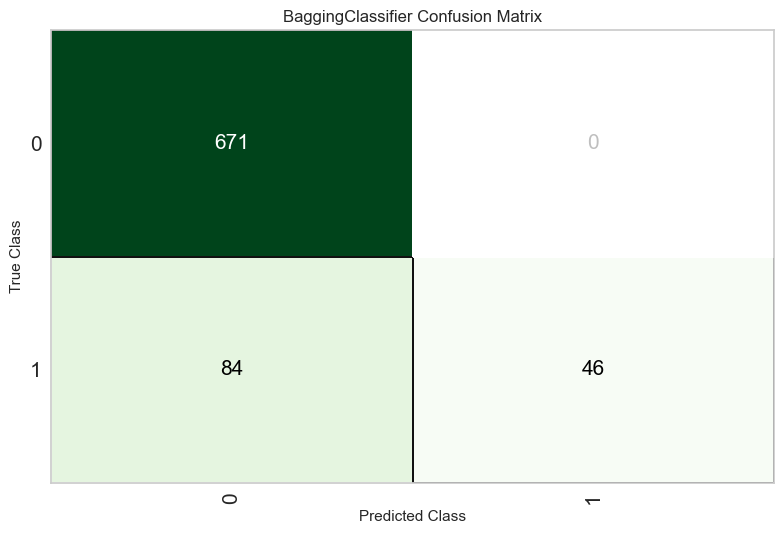

In [185]:
plot_model(final_model, plot = 'confusion_matrix')

In [ ]:
### 9-6 모델 예측 확인하기

In [186]:
prediction = predict_model(final_model, data=X_test.iloc[-100:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7400,0.6107,0.0400,0.3333,0.0714,0.0189,0.0338


In [187]:
prediction

,대출이자율,부채대비소득비율,연소득금액,과거리볼빙발생개월수,최근거래횟수,대출금액,근무연차,리볼링잔액,대출상환기간,투자자대출약정금액,...,신용한도금액,신용평가불랭이후개월수,상담횟수,최근할부발생개월수,12개월간상담횟수,최종연체개월수,은행카드개수,대출현재상태,prediction_label,prediction_score
32450,11.140000,11.060000,100000.0,123.0,2.0,8800.0,1.0,20067.0,36 months,8800.0,...,89141.0,40.0,NaN,NaN,NaN,40.0,5.0,0,0,0.9755
4086,18.490000,31.639999,51500.0,NaN,7.0,10000.0,NaN,39153.0,36 months,10000.0,...,80866.0,NaN,NaN,NaN,NaN,71.0,NaN,1,0,0.8558
1480,12.120000,12.060000,29852.0,NaN,NaN,6550.0,6.0,5584.0,36 months,6550.0,...,NaN,NaN,NaN,NaN,NaN,68.0,NaN,1,0,0.8998
6371,17.270000,13.560000,76000.0,52.0,9.0,8000.0,4.0,12901.0,36 months,8000.0,...,27451.0,NaN,NaN,NaN,NaN,NaN,11.0,0,0,0.8664
15272,13.110000,7.430000,79000.0,186.0,4.0,10000.0,10.0,15734.0,36 months,10000.0,...,15734.0,NaN,NaN,NaN,NaN,28.0,8.0,0,0,0.9475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37179,10.160000,13.160000,27000.0,192.0,3.0,6075.0,10.0,7118.0,36 months,6075.0,...,7118.0,NaN,NaN,NaN,NaN,NaN,3.0,0,0,0.8715
29660,19.219999,16.900000,90000.0,NaN,0.0,30000.0,3.0,6466.0,36 months,29975.0,...,12267.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.8310
34987,7.900000,19.150000,39480.0,NaN,3.0,2500.0,10.0,14422.0,36 months,2500.0,...,26173.0,NaN,NaN,NaN,NaN,79.0,NaN,0,0,0.9682
28282,14.330000,21.889999,68000.0,178.0,3.0,16000.0,7.0,15070.0,60 months,16000.0,...,46890.0,NaN,NaN,NaN,NaN,NaN,9.0,0,0,0.8561
